# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!python3 --version
!pip install -r requirements.txt

Python 3.6.8 :: Anaconda, Inc.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

# please do not modify the line below
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Train Agent in the Environment

We will train agent for around 2500 episodes or until the agents scores more than 13 average score in 100 consecutive episodes

In [6]:
from main import dqn

scores = dqn(env=env)

Number of agents: 1
Number of actions: 4
States look like: [0.         0.         1.         0.         0.16101955 1.
 0.         0.         0.         0.04571758 1.         0.
 0.         0.         0.2937662  0.         0.         1.
 0.         0.14386636 0.         0.         1.         0.
 0.16776823 1.         0.         0.         0.         0.04420976
 1.         0.         0.         0.         0.05423063 0.
 0.        ]
States have length: 37
Episode 100	Average Score: 0.34
Episode 200	Average Score: 0.65
Episode 300	Average Score: 1.09
Episode 400	Average Score: 2.56
Episode 500	Average Score: 3.80
Episode 600	Average Score: 4.61
Episode 700	Average Score: 5.32
Episode 800	Average Score: 6.21
Episode 900	Average Score: 6.99
Episode 1000	Average Score: 7.13
Episode 1100	Average Score: 8.12
Episode 1200	Average Score: 9.33
Episode 1300	Average Score: 9.78
Episode 1400	Average Score: 9.988
Episode 1500	Average Score: 10.41
Episode 1600	Average Score: 11.15
Episode 1700	Average 

Text(0.5, 0, 'Episode #')

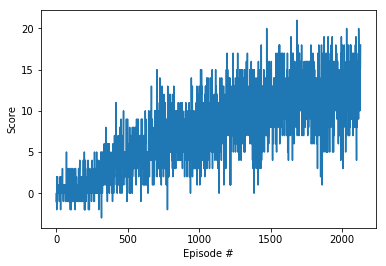

In [16]:
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')